In [1]:
import pandas as pd
import numpy as np

data_url = "boston.txt"
data_columns = "CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT".split(" ")
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
df = pd.DataFrame(data, columns=data_columns)
df["MEDV"] = target

In [2]:
raw_df.shape

(1012, 11)

In [3]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


C:\Users\lizal\AppData\Local\Temp\ipykernel_29916\358534029.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MEDV, bins=30)


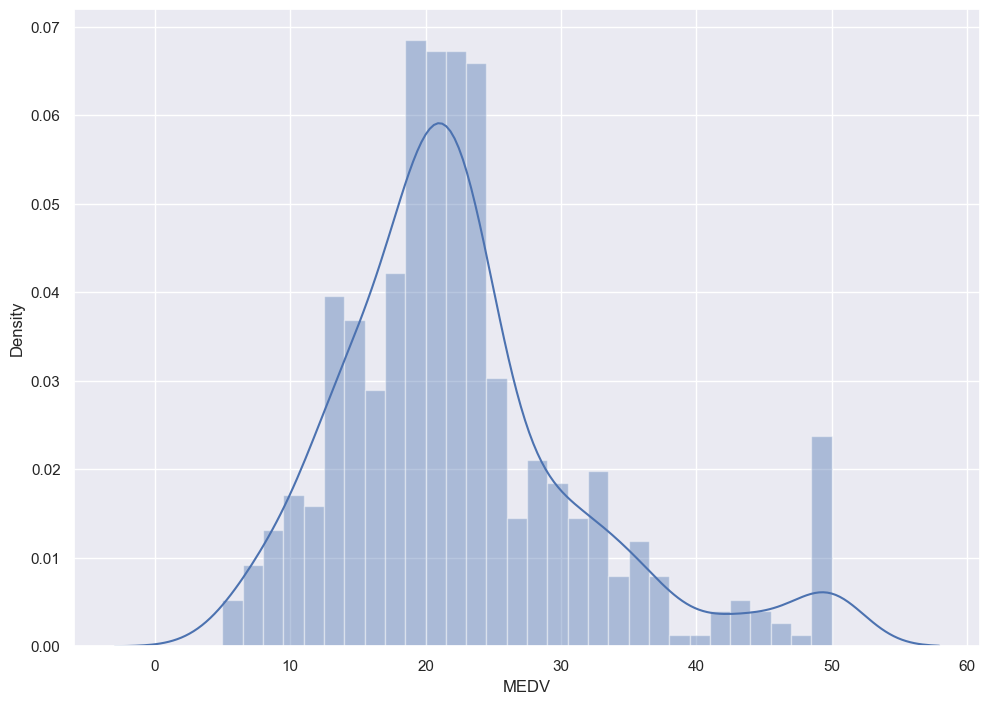

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={"figure.figsize": (11.7, 8.27)})
sns.distplot(df.MEDV, bins=30)
plt.show()

<Axes: >

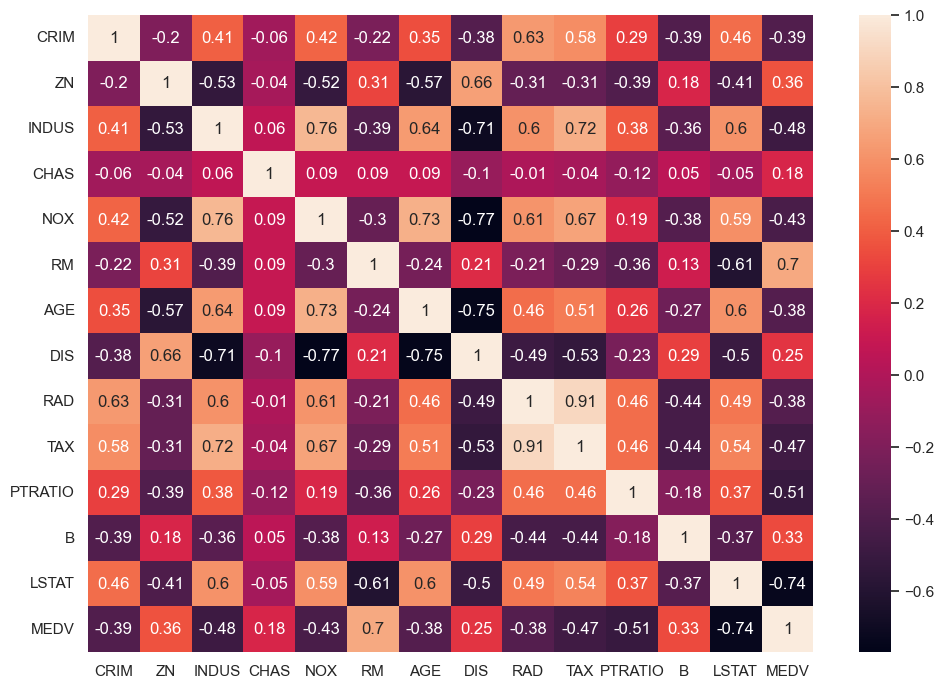

In [7]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

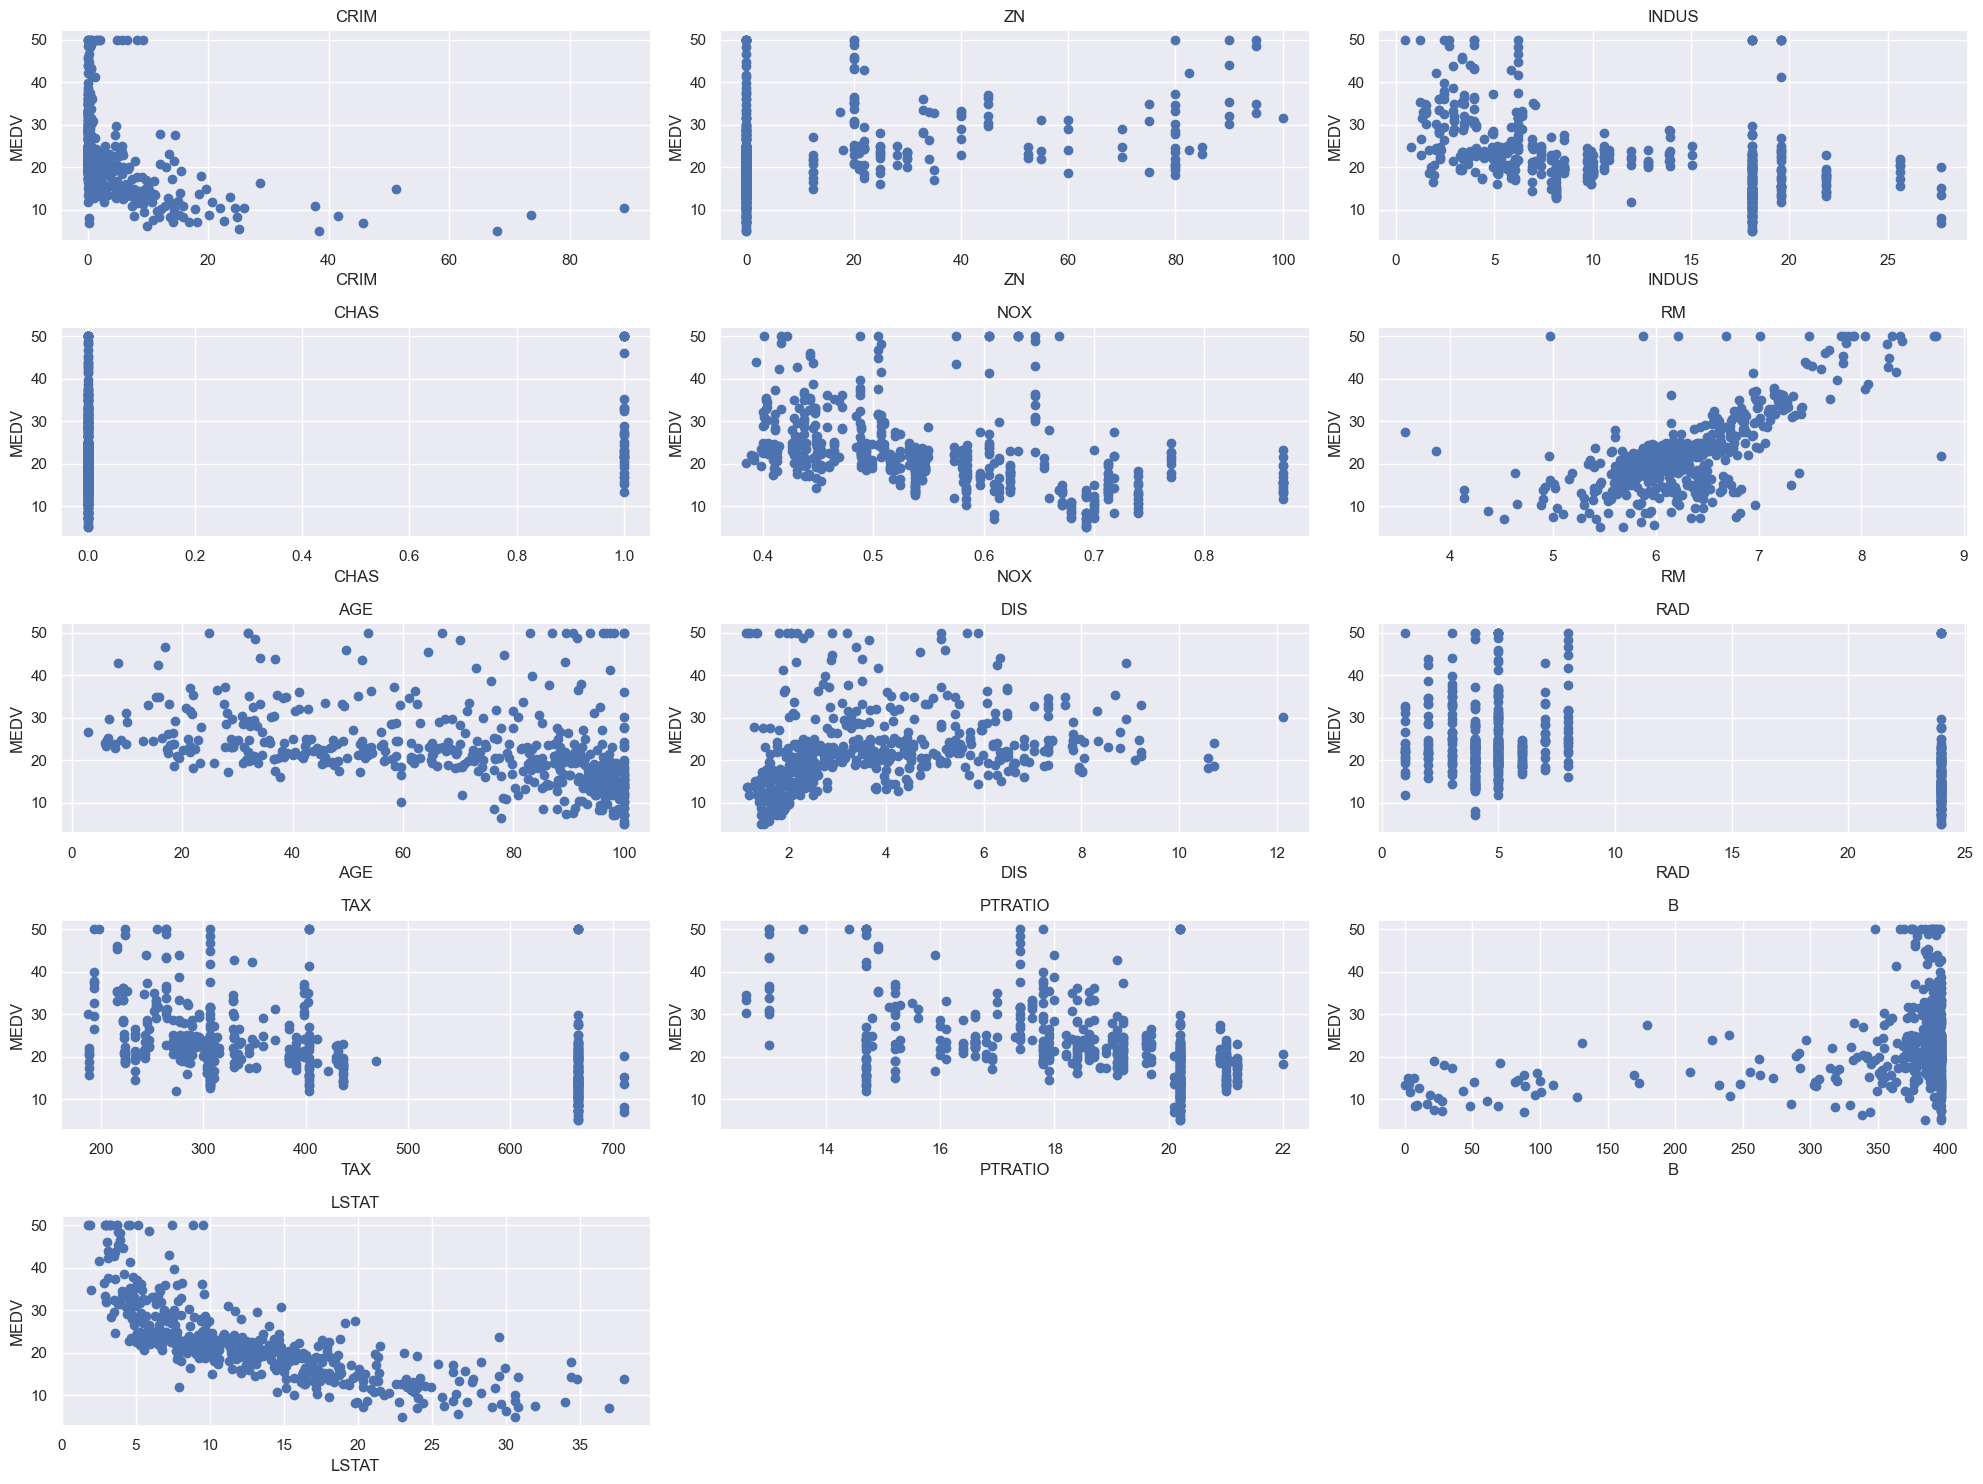

In [8]:
plt.figure(figsize=(20, 15)) 
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = df['MEDV']

num_plots_per_row = 3 
num_rows = (len(features) - 1) // num_plots_per_row + 1  

for i, col in enumerate(features):
    plt.subplot(num_rows, num_plots_per_row, i + 1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

plt.tight_layout()  
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
target = df['MEDV']
features = df.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
print(np.array(X_train).shape, np.array(X_test).shape)

(404, 13) (102, 13)


In [10]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

print ('Train r_squared:', regr.score(X_train, y_train))
print('Test r-squared:', regr.score(X_test, y_test))

print('Intercpect', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Train r_squared: 0.750121534530608
Test r-squared: 0.6709339839115638
Intercpect 36.53305138282457


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [11]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)


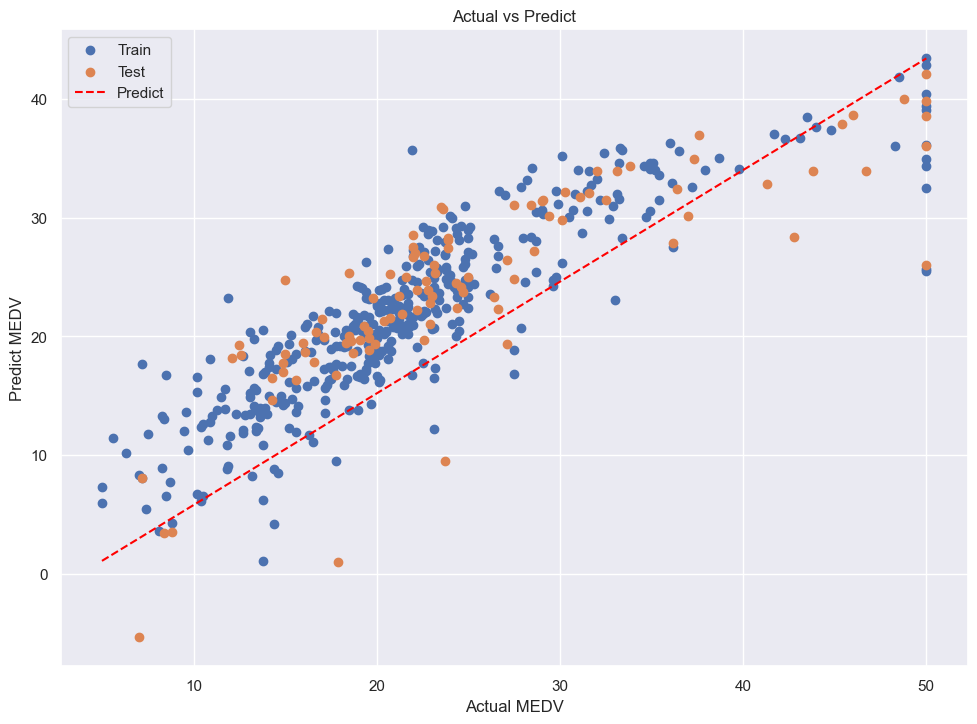

In [12]:

plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_test_pred, label='Test')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='red', linestyle='--', label='Predict')
plt.xlabel('Actual MEDV')
plt.ylabel('Predict MEDV')
plt.legend()
plt.title('Actual vs Predict')
plt.show()


# Логарифмирование 

In [13]:
y_log = np.log(df['MEDV'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: MEDV, dtype: float64

In [14]:
y_log.skew()

-0.33032129530987864

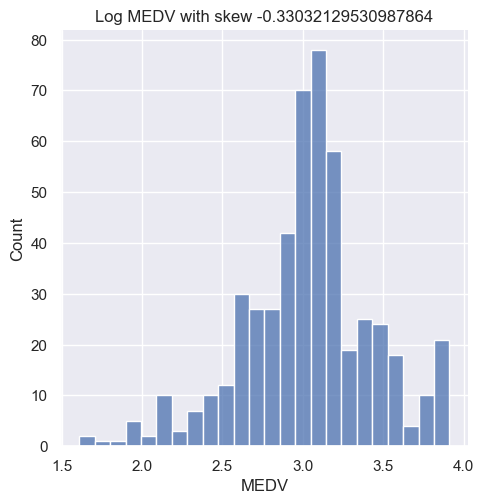

In [15]:
sns.displot(y_log)
plt.title(f'Log MEDV with skew {y_log.skew()}')
plt.show()

In [16]:
target = np.log(df['MEDV'])
features = df.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [17]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print ('Train r_squared:', regr.score(X_train, y_train))
print('Test r-squared:', regr.score(X_test, y_test))

print('Intercpect', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Train r_squared: 0.7930234826697584
Test r-squared: 0.7446922306260745
Intercpect 4.059943871775209


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [18]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)


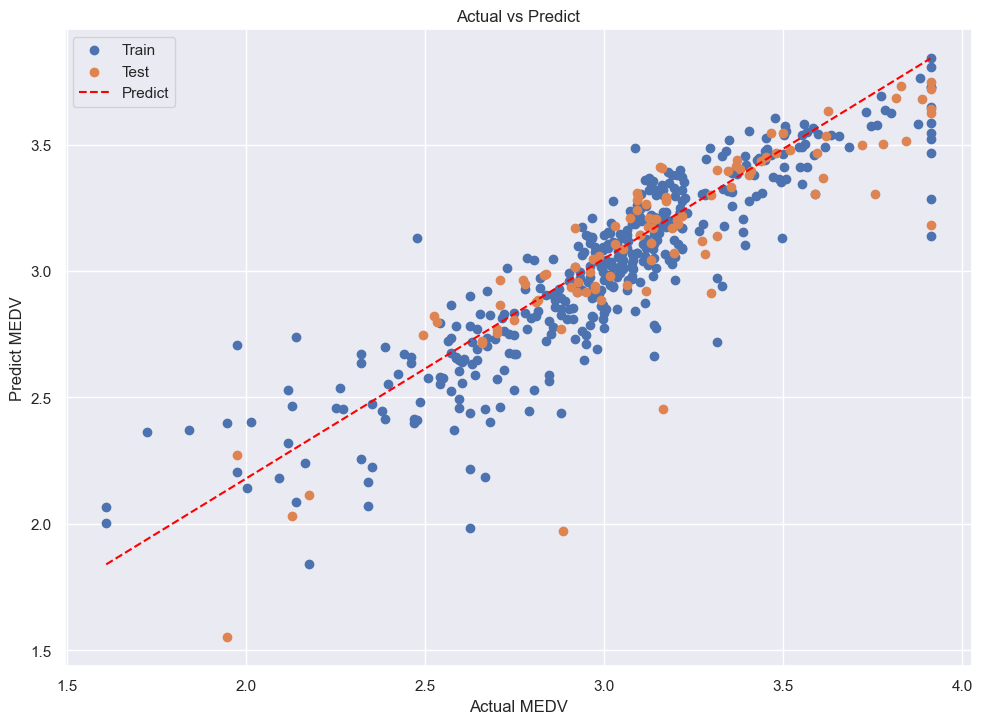

In [19]:
plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_test_pred, label='Test')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='red', linestyle='--', label='Predict')
plt.xlabel('Actual MEDV')
plt.ylabel('Predict MEDV')
plt.legend()
plt.title('Actual vs Predict')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_test_pred)
print("MSE without regularization: ", MSE)

MSE without regularization:  0.042600946922013674


# L1 Регуляризация
С логарифмированием 

In [21]:
target = np.log(df['MEDV'])
features = df.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(np.array(X_train).shape, np.array(X_test).shape)

(404, 13) (102, 13)


In [22]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
print ('Train r_squared:', model.score(X_train, y_train))
print('Test r-squared:', model.score(X_test, y_test))

print('Intercpect', model.intercept_)
pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['coef'])

Train r_squared: 0.7935380034253593
Test r-squared: 0.7418515738721888
Intercpect 3.621259934244462


,coef
CRIM,-0.009504
ZN,0.000842
INDUS,0.001625
CHAS,0.074838
NOX,-0.390927
RM,0.113041
AGE,-0.000359
DIS,-0.043761
RAD,0.010535
TAX,-0.000540


In [23]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

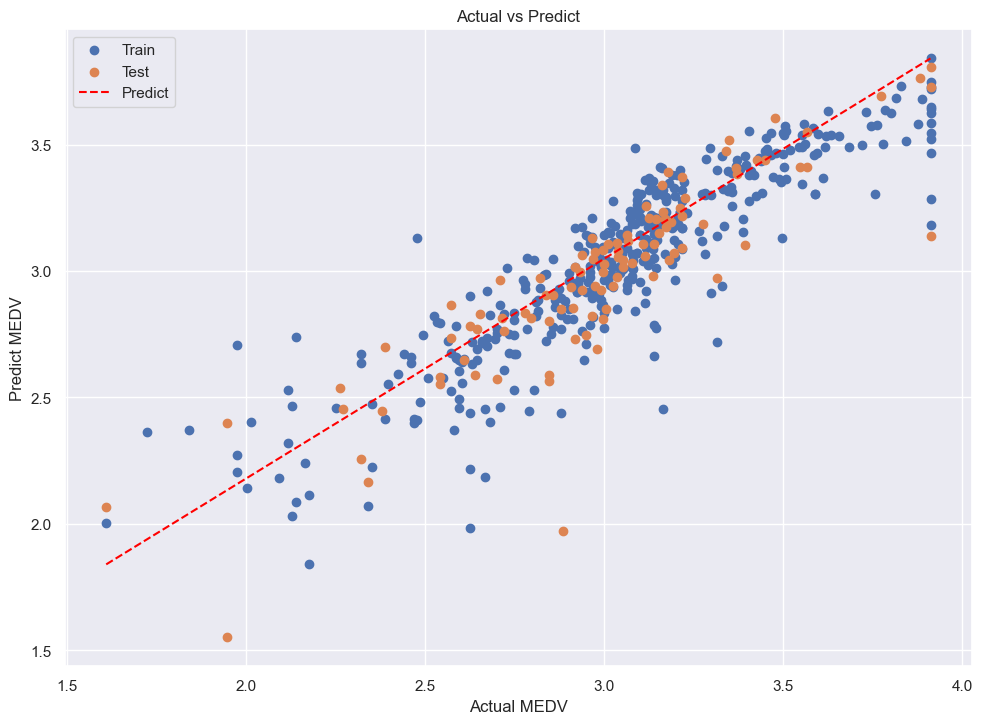

In [24]:
plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_test_pred, label='Test')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='red', linestyle='--', label='Predict')
plt.xlabel('Actual MEDV')
plt.ylabel('Predict MEDV')
plt.legend()
plt.title('Actual vs Predict')
plt.show()

In [25]:
MSE = mean_squared_error(y_test, y_test_pred)
print("MSE with L1 regularization: ", MSE)

MSE with L1 regularization:  0.03615006781721609


# L2 Регуляризация
Без логарифмирования

In [26]:
target = df['MEDV']
features = df.drop('MEDV', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(np.array(X_train).shape, np.array(X_test).shape)

(404, 13) (102, 13)


In [27]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.01)
model.fit(X_train, y_train)
print ('Train r_squared:', model.score(X_train, y_train))
print('Test r-squared:', model.score(X_test, y_test))

print('Intercpect', model.intercept_)
pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['coef'])

Train r_squared: 0.7508849668585106
Test r-squared: 0.6687509462063155
Intercpect 30.152156775379016


,coef
CRIM,-0.112985
ZN,0.030148
INDUS,0.039793
CHAS,2.780848
NOX,-17.065673
RM,4.439608
AGE,-0.006405
DIS,-1.445908
RAD,0.262173
TAX,-0.010661


In [28]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

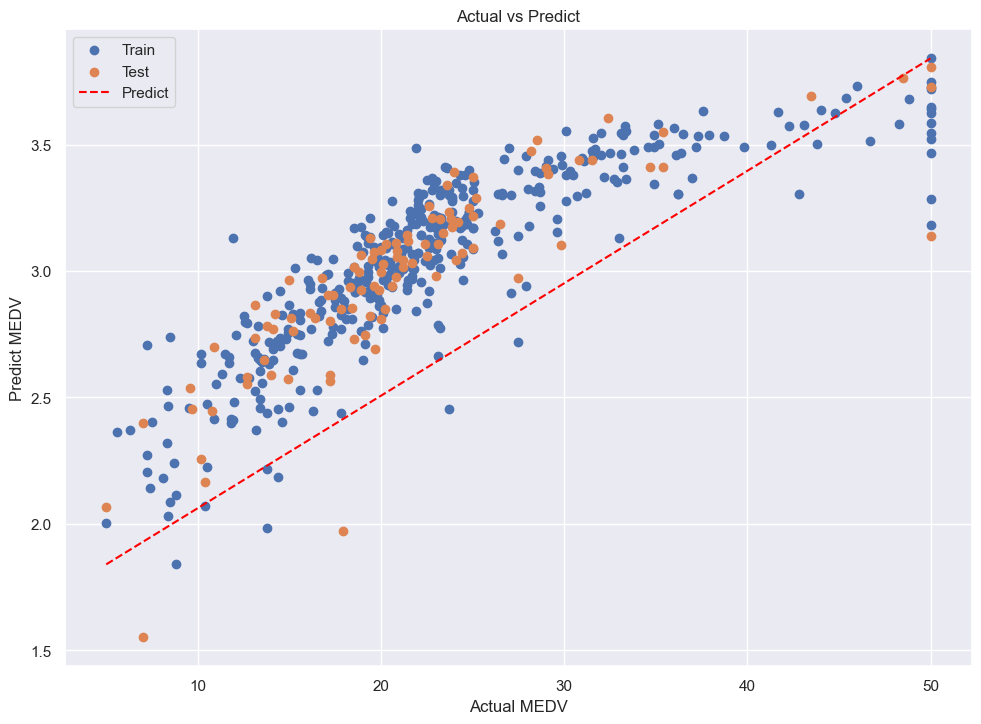

In [29]:
plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_test_pred, label='Test')
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], color='red', linestyle='--', label='Predict')
plt.xlabel('Actual MEDV')
plt.ylabel('Predict MEDV')
plt.legend()
plt.title('Actual vs Predict')
plt.show()

In [30]:
MSE = mean_squared_error(y_test, y_test_pred)
print("MSE with L2 regularization: ", MSE)

MSE with L2 regularization:  410.58854720987887
